In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
raw = pd.read_csv('train_loan.csv', index_col = 'Loan_ID')
raw.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [19]:
raw.count

<bound method DataFrame.count of           Gender Married Dependents     Education Self_Employed  \
Loan_ID                                                           
LP001002    Male      No          0      Graduate            No   
LP001003    Male     Yes          1      Graduate            No   
LP001005    Male     Yes          0      Graduate           Yes   
LP001006    Male     Yes          0  Not Graduate            No   
LP001008    Male      No          0      Graduate            No   
LP001011    Male     Yes          2      Graduate           Yes   
LP001013    Male     Yes          0  Not Graduate            No   
LP001014    Male     Yes         3+      Graduate            No   
LP001018    Male     Yes          2      Graduate            No   
LP001020    Male     Yes          1      Graduate            No   
LP001024    Male     Yes          2      Graduate            No   
LP001027    Male     Yes          2      Graduate           NaN   
LP001028    Male     Yes     

In [5]:
raw.apply(lambda x: sum(x.isnull()), axis = 0)


Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
raw.dtypes


Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
##################...[I] Variable Identification...###################
#TYPES OF VARIABLES
#Predictor variables
 #1) Gender 
 #2) Married
 #3) Dependents
 #4) Education
 #5) Self_Employed
 #6) Credit_History *int
 #7) Property_Area
 #8) ApplicantIncome
 #9) CoapplicantIncome
 #10) LoanAmount 
 #11) Loan_Amount_Term *float

#Target variables
 #1) Loan_Status
    

In [ ]:
#DATA TYPES
#Character
 #1) Gender 
 #2) Married
 #3) Dependents
 #4) Education 
 #5) Self_Employed
 #6) Property_Area
 #7) Loan_Status [TARGET/OUTPUT]

#Numeric 
 #1) ApplicantIncome
 #2) CoapplicantIncome
 #3) LoanAmount
 #4) Credit_History *int
 #5) Loan_Amount_Term *float

In [14]:
#VARIABLE CATEGORY
# [A] Categorical 
 #1) Gender 
 #2) Married
 #3) Dependents
 #4) Education
 #5) Self_Employed
 #6) Credit_History *int
 #7) Property_Area
 #8) Loan_Status [LABEL/TARGET/OUTPUT]
 #9) Loan_Amount_Term *float

# [B] Continuous 
 #1) ApplicantIncome
 #2) CoapplicantIncome
 #3) LoanAmount



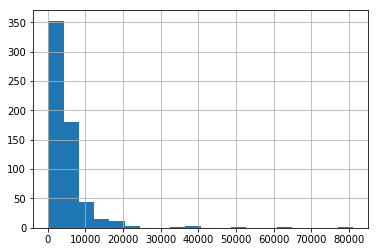

In [18]:
##################...[II] Univariate Analysis...###################
# [II] univariate Analysis is going on....
#part1 
# [A] CONTINUOUS VARIABLES
    #1) ApplicantIncome
raw['ApplicantIncome'].hist(bins=20)

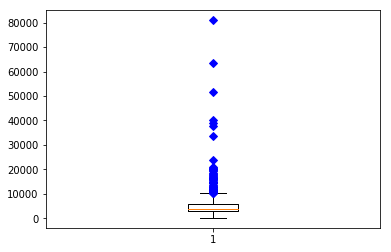

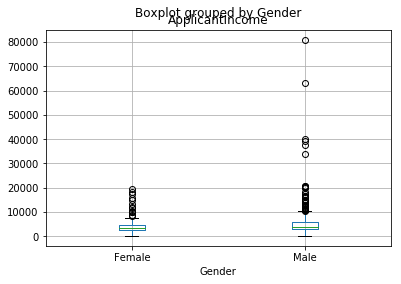

In [7]:
# Remember both types of implementing boxplot
plt.boxplot(raw['ApplicantIncome'],0, 'bD') #gD mean green Dots; rs means red Square
raw.boxplot(column = 'ApplicantIncome', by='Gender' )

In [8]:
#ApplicantIncome has many outliers as shown in histogram and boxplot 
from statistics import mode
import statistics as st
print ("mean=",np.mean(raw['ApplicantIncome']))
print ('Median =',np.median(raw['ApplicantIncome']))
print ('Mode =',mode(raw['ApplicantIncome']))
var = st.pvariance(raw['ApplicantIncome'])
stdev = st.stdev(raw['ApplicantIncome'])
print ('Variance =',var)
print('Standard Deviation',stdev)

#Alternate Way

raw['ApplicantIncome'].describe()

mean= 5403.459283387622
Median = 3812.5
Mode = 2500
Variance = 37259607.772772126
Standard Deviation 6109.041673387178


count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


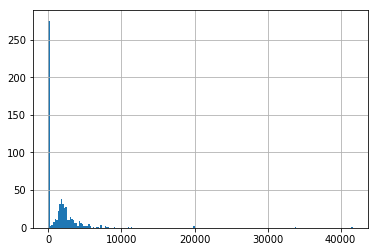

In [67]:
# [II] univariate Analysis is going on....
#part1 
# [A] CONTINUOUS VARIABLES
    #2) CoapplicantIncome
print(raw['CoapplicantIncome'].describe())
print(raw['CoapplicantIncome'].hist(bins=200))

# #print(plt.boxplot(raw['CoapplicantIncome']))

# Most of the coapplicants have 0 income which must be handled

# ther e are few outliers in coapplicant case having much higher income than the average income of the coapplicants


count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


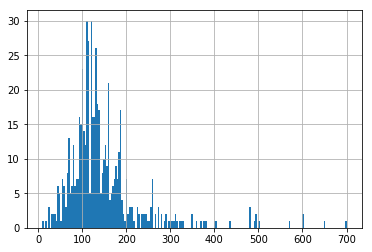

In [9]:
# [I] univariate Analysis is going on....
#part1 
# [A] CONTINUOUS VARIABLES
    #3) LoanAmount
# it has 22 missing values
print(raw['LoanAmount'].describe())
print(raw['LoanAmount'].hist(bins=200))

count      601
unique       2
top       Male
freq       489
Name: Gender, dtype: object
Mode = Male
Missing Values = 13


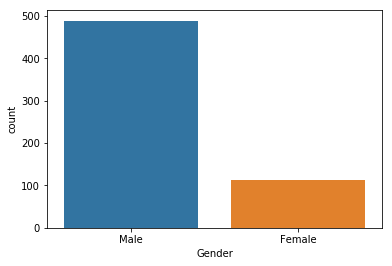

In [10]:
# [II] univariate Analysis is going on....
#part2 

#[A] CATEGORICAL VARIBALES
#1) Gender  
# There Are 13 Missing values in it

print(raw['Gender'].describe())
#plt.bar(raw['Gender'], range(len(raw['Gender'])),align='center', alpha=0.5)
print('Mode =',st.mode(raw['Gender']))
print ('Missing Values = 13')
import seaborn as sns
sns.countplot(raw['Gender'])

count     611
unique      2
top       Yes
freq      398
Name: Married, dtype: object
Mode = Yes
Missing Values = 3


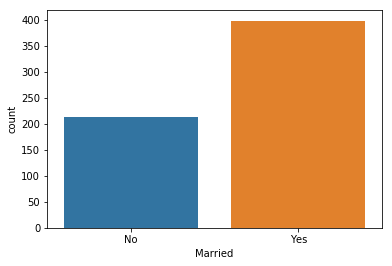

In [12]:
# [II] univariate Analysis is going on....
#part2 

#[A] CATEGORICAL VARIBALES
#2) Married
# There Are 3 Missing values in it

print(raw['Married'].describe())
print('Mode =',st.mode(raw['Married']))
print ('Missing Values = 3')
sns.countplot(raw['Married'])

count     599
unique      4
top         0
freq      345
Name: Dependents, dtype: object
Mode = 0
Missing Values = 15


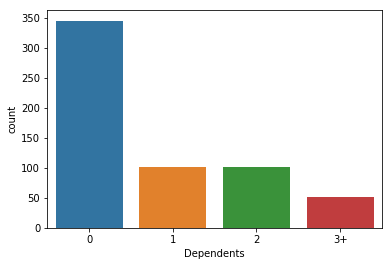

In [13]:
# [II] univariate Analysis is going on....
#part2 

#[A] CATEGORICAL VARIBALES
#3) Dependents
# There Are 15 Missing values in it

print(raw['Dependents'].describe())
print('Mode =',st.mode(raw['Dependents']))
print ('Missing Values = 15')
sns.countplot(raw['Dependents'])

# We might need to handle 3+ 

In [22]:
print('Raw Data has [614 rows x 12 columns]')


Raw Data has [614 rows x 12 columns]


count          614
unique           2
top       Graduate
freq           480
Name: Education, dtype: object
Mode = Graduate
Missing Values = 0


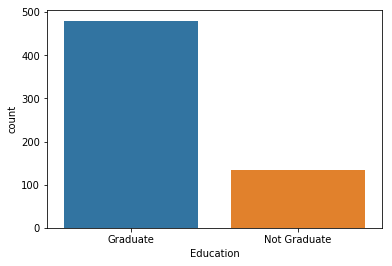

In [23]:
# [II] univariate Analysis is going on....
#part2 

#[A] CATEGORICAL VARIBALES
#4) Education
#There Are 0 Missing values in it

print(raw['Education'].describe())
print('Mode =',st.mode(raw['Education']))
print ('Missing Values = 0')
sns.countplot(raw['Education'])


count     582
unique      2
top        No
freq      500
Name: Self_Employed, dtype: object
Mode = No
Missing Values = 0


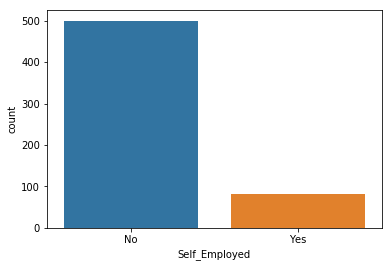

In [26]:
# [II] univariate Analysis is going on....
#part2 

#[A] CATEGORICAL VARIBALES
#5) Self_Employed
#There Are 32 Missing values in it

print(raw['Self_Employed'].describe())
print('Mode =',st.mode(raw['Self_Employed']))
print ('Missing Values = 0')
sns.countplot(raw['Self_Employed'])


count    564.000000
mean       0.842199
std        0.364878
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Credit_History, dtype: float64
Mode = 1.0
Missing Values = 50


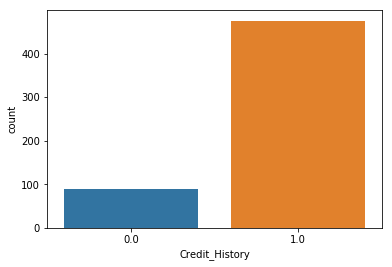

In [30]:
# [II] univariate Analysis is going on....
#part2 

#[A] CATEGORICAL VARIBALES
#6) Credit_History
#There Are 50 Missing values in it

print(raw['Credit_History'].describe())
print('Mode =',st.mode(raw['Credit_History']))
print ('Missing Values = 50')
sns.countplot(raw['Credit_History'])


count           614
unique            3
top       Semiurban
freq            233
Name: Property_Area, dtype: object
Mode = Semiurban
Missing Values = 0


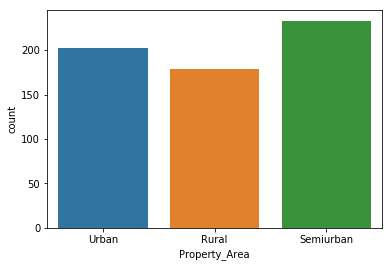

In [29]:
# [II] univariate Analysis is going on....
#part2 

#[A] CATEGORICAL VARIBALES
#7) Property_Area
#There Are 0 Missing values in it

print(raw['Property_Area'].describe())
print('Mode =',st.mode(raw['Property_Area']))
print ('Missing Values = 0')
sns.countplot(raw['Property_Area'])


count     614
unique      2
top         Y
freq      422
Name: Loan_Status, dtype: object
Mode = Y
Missing Values = 0


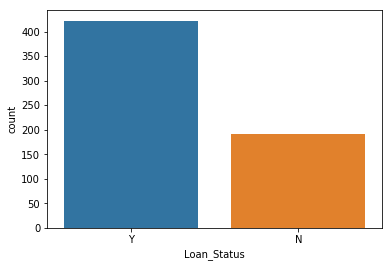

In [31]:
# [II] univariate Analysis is going on....
#part2 

#[A] CATEGORICAL VARIBALES
#8) Loan_Status [LABEL/TARGET/OUTPUT]
#There Are 0 Missing values in it

print(raw['Loan_Status'].describe())
print('Mode =',st.mode(raw['Loan_Status']))
print ('Missing Values = 0')
sns.countplot(raw['Loan_Status'])


count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64
Mode = 360.0
Missing Values = 14


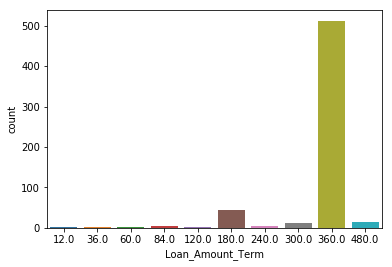

In [32]:
# [II] univariate Analysis is going on....
#part2 

#[A] CATEGORICAL VARIBALES
#9) Loan_Amount_Term
#There Are 14 Missing values in it

print(raw['Loan_Amount_Term'].describe())
print('Mode =',st.mode(raw['Loan_Amount_Term']))
print ('Missing Values = 14')
sns.countplot(raw['Loan_Amount_Term'])


In [ ]:
######################...[III] BIVARIATE VARIABLE ANALYSIS...####################
#[A] CATEGORICAL VARIBALES & CATEGORICAL VARIABLES
#[B] CONTINUOUS VARIABLES & CONTINUOUS VARIABLES
#[C] CATEGORICAL VARIABLES & CONTINUOUS VARIABLES



In [ ]:
#[III] BIVARIATE VARIABLE ANALYSIS is going on...
#[A] CATEGORICAL VARIBALES & CATEGORICAL VARIABLES


In [ ]:
#[III] BIVARIATE VARIABLE ANALYSIS is going on...
#[B] CONTINUOUS VARIABLES & CONTINUOUS VARIABLES


In [ ]:
#[III] BIVARIATE VARIABLE ANALYSIS is going on...
#[C] CATEGORICAL VARIABLES & CONTINUOUS VARIABLES



In [ ]:
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
    
#VARIABLE CATEGORY
# [A] Categorical 
 #1) Gender 
 #2) Married
 #3) Dependents
 #4) Education
 #5) Self_Employed
 #6) Credit_History *int
 #7) Property_Area
 #8) Loan_Status [LABEL/TARGET/OUTPUT]
 #9) Loan_Amount_Term *float

# [B] Continuous 
 #1) ApplicantIncome
 #2) CoapplicantIncome
 #3) LoanAmount
